## Задача поиска схожих по смыслу предложений

Мы будем ранжировать вопросы [StackOverflow](https://stackoverflow.com) на основе семантического векторного представления

## Задача ранжирования(Learning to Rank)

* $X$ - множество объектов
* $X^l = \{x_1, x_2, ..., x_l\}$ - обучающая выборка
<br>На обучающей выборке задан порядок между некоторыми элементами, то есть нам известно, что некий объект выборки более релевантный для нас, чем другой:
* $i \prec j$ - порядок пары индексов объектов на выборке $X^l$ c индексами $i$ и $j$
### Задача:
построить ранжирующую функцию $a$ : $X \rightarrow R$ такую, что
$$i \prec j \Rightarrow a(x_i) < a(x_j)$$

### Embeddings

Будем использовать предобученные векторные представления слов на постах Stack Overflow.<br>
[A word2vec model trained on Stack Overflow posts](https://github.com/vefstathiou/SO_word2vec)

In [ ]:
# !wget https://zenodo.org/record/1199620/files/SO_vectors_200.bin?download=1

Загрузку будем производить с гугл диска, для этого сначала монтируем гугл диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from gensim.models.keyedvectors import KeyedVectors
path_to_file = '/content/drive/MyDrive/Datasets Deep Learning/SO_vectors_200.bin_download=1'
wv_embeddings = KeyedVectors.load_word2vec_format(path_to_file, binary=True)

In [ ]:
list(wv_embeddings.key_to_index.keys())

['use',
 'code',
 'using',
 'like',
 'will',
 'want',
 'need',
 'get',
 'file',
 'one',
 'just',
 'data',
 'way',
 '1',
 'also',
 'function',
 'problem',
 'error',
 '-',
 'example',
 '2',
 'class',
 'work',
 'value',
 'method',
 'first',
 'set',
 'see',
 'following',
 '0',
 'user',
 'make',
 'new',
 'add',
 'know',
 'try',
 'time',
 'something',
 'http',
 'trying',
 'create',
 'object',
 'now',
 'page',
 'server',
 'string',
 'help',
 'app',
 'list',
 'table',
 'application',
 'run',
 'two',
 'call',
 'change',
 'works',
 'used',
 'type',
 '3',
 'array',
 'find',
 'name',
 'html',
 'tried',
 'case',
 'gt',
 'lt',
 'line',
 'instead',
 'different',
 'question',
 'thanks',
 'however',
 'working',
 'java',
 'files',
 'view',
 'solution',
 'php',
 'another',
 'check',
 'project',
 'values',
 'database',
 'think',
 'sure',
 'number',
 'text',
 'image',
 'may',
 'query',
 'possible',
 'without',
 'id',
 'able',
 'since',
 'look',
 'version',
 'variable',
 'found',
 'issue',
 '4',
 'please',


Посмотрим на примере одного слова, что из себя представляет embedding

In [ ]:
word = 'dog'
if word in wv_embeddings:
    print(wv_embeddings[word].dtype, wv_embeddings[word].shape)

float32 (200,)


In [ ]:
type(wv_embeddings[word])

numpy.ndarray

In [ ]:
print(f"Num of words: {len(wv_embeddings.index_to_key)}")

Num of words: 1787145


In [ ]:
import numpy as np
import re
class MyTokenizer:
    def __init__(self):
        pass
    def tokenize(self, text):
        return re.findall('\w+', text)
tokenizer = MyTokenizer()

In [ ]:
def question_to_vec(question, embeddings, tokenizer, dim=200, embeddings_keys_set=None):
    """
    Преобразует строку вопроса в векторное представление.

    Parameters:
        question: строка
        embeddings: наше векторное представление
        dim: размер любого вектора в нашем представлении
        tokenizer: токенизатор для разбиения строки на слова
        embeddings_keys_set: множество слов, образующих словарь (опционально)
    Return:
        векторное представление для вопроса
    """
    tokenized_question = tokenizer.tokenize(question)
    question_embedding = np.zeros(dim)
    # если множество ключей не передано, создаем его
    if embeddings_keys_set is None:
        embeddings_keys_set = set(embeddings.key_to_index.keys()) # множество слов, образующих словарь
    num_words_in_quest = 0
    for token in tokenized_question:
        if token in embeddings_keys_set:
            num_words_in_quest += 1
            embedding = embeddings[token]

            if dim < embeddings.vector_size:
                embedding = embedding[:dim] # обрезаем эмбеддинг, если его размер больше чем dim

            else:
                embedding = np.pad(embedding, (0, dim - embeddings.vector_size)) # дополняем эмбеддинг нулями если его размер меньше чем dim

            question_embedding += embedding

    # возвращаем нулевой вектор, если ни одно слово из предложения не найдено в словаре
    if num_words_in_quest == 0:
        return question_embedding

    return question_embedding / num_words_in_quest

In [ ]:
question_to_vec('I love neural networks', wv_embeddings, tokenizer)

array([-1.01422749, -1.68912624, -1.28541217, -1.37103013,  0.15916634,
        0.0670696 ,  1.11884137, -0.07051762,  0.53863693, -0.37139114,
        0.28913016,  1.03125   , -2.86546615, -1.31928726,  2.20982948,
        1.16786722,  1.08419518,  1.84672268, -0.98733809,  0.87209455,
       -0.17219625,  0.73839017, -0.78278264, -0.88278695, -0.61526108,
       -0.15872356, -0.61707981,  0.36668165,  2.01375335,  0.26274722,
       -1.4950124 , -1.38671508, -1.20499369, -1.01661696,  2.76211715,
        1.72557124, -0.19038178, -0.58994474, -0.1141155 , -1.88903529,
       -1.78835048, -0.20420383, -0.70620341,  2.4890339 , -0.15452717,
        1.12550129,  0.26108352,  1.31532462, -0.57667526, -0.33271411,
        1.67649019,  0.91229995, -0.6988014 ,  2.37525521, -1.76342229,
        3.13780514,  1.22432033, -1.05544141,  0.78975705,  0.04404024,
        1.16230452, -0.44780231, -0.9149816 ,  0.01501505, -0.85523087,
       -1.01834532, -0.71621163,  1.0727205 ,  0.88818762, -0.29

### Оценка близости текстов

Представим, что мы используем идеальные векторные представления слов. Тогда косинусное расстояние между дублирующими предложениями должно быть меньше, чем между случайно взятыми предложениями.

Сгенерируем для каждого из $N$ вопросов $R$ случайных отрицательных примеров и примешаем к ним также настоящие дубликаты. Для каждого вопроса будем ранжировать с помощью нашей модели $R + 1$ примеров и смотреть на позицию дубликата. Мы хотим, чтобы дубликат был первым в ранжированном списке.

#### Hits@K
Первой простой метрикой будет количество корректных попаданий для какого-то $K$:
$$ \text{Hits@K} = \frac{1}{N}\sum_{i=1}^N \, [rank\_q_i^{'} \le K],$$
* $\begin{equation*}
[x < 0 ] \equiv
 \begin{cases}
   1, &x < 0\\
   0, &x \geq 0
 \end{cases}
\end{equation*}$ - индикаторная функция
* $q_i$ - $i$-ый вопрос
* $q_i^{'}$ - его дубликат
* $rank\_q_i^{'}$ - позиция дубликата в ранжированном списке ближайших предложений для вопроса $q_i$.

Hits@K  измеряет долю вопросов, для которых правильный ответ попал в топ-K позиций среди отранжированных кандидатов.

#### DCG@K
Второй метрикой будет упрощенная DCG метрика, учитывающая порядок элементов в списке путем домножения релевантности элемента на вес равный обратному логарифму номера позиции::
$$ \text{DCG@K} = \frac{1}{N} \sum_{i=1}^N\frac{1}{\log_2(1+rank\_q_i^{'})}\cdot[rank\_q_i^{'} \le K],$$
С такой метрикой модель штрафуется за большой ранк корректного ответа.

DCG@K  измеряет качество ранжирования, учитывая не только факт наличия правильного ответа в топ-K, но и ***его точную позицию***.

### HITS\_COUNT и DCG\_SCORE

In [ ]:
def hits_count(dup_ranks, k):
    """
        dup_ranks: list индексов дубликатов
        k: пороговое значение для ранга
        result: вернуть Hits@k
    """
    # Подсчитываем количество дубликатов, чей ранг <= k
    num_relevant = 0 # количество релевантных дубликатов
    for dup_rank in dup_ranks:
      if dup_rank <= k:
        num_relevant += 1
    hits_value = num_relevant / len(dup_ranks)
    return hits_value

In [ ]:
dup_ranks = [2]

k = 1
hits_value = hits_count(dup_ranks, k)
print(f"Hits@1 = {hits_value}")

k = 4
hits_value = hits_count(dup_ranks, k)
print(f"Hits@4 = {hits_value}")

Hits@1 = 0.0
Hits@4 = 1.0


In [ ]:
import math

def dcg_score(dup_ranks, k):
    """
        dup_ranks: list индексов дубликатов
        k: пороговое значение для ранга
        result: вернуть DCG@k
    """
    # Вычисляем сумму для всех релевантных дубликатов
    sum_relevant = 0 # сумма для релевантных дубликатов
    for dup_rank in dup_ranks:
      if dup_rank <= k:
        sum_relevant += 1 / math.log2(1 + dup_rank)

    # Делим на общее количество вопросов
    dcg_value = sum_relevant / len(dup_ranks)
    return dcg_value

In [ ]:
# Пример списка позиций дубликатов
dup_ranks = [2]

# Вычисляем DCG@1
dcg_value = dcg_score(dup_ranks, k=1)
print(f"DCG@1 = {dcg_value:.3f}")

# Вычисляем DCG@4
dcg_value = dcg_score(dup_ranks, k=4)
print(f"DCG@10 = {dcg_value:.3f}")

DCG@1 = 0.000
DCG@10 = 0.631


### Данные
[arxiv link](https://drive.google.com/file/d/1QqT4D0EoqJTy7v9VrNCYD-m964XZFR7_/edit)

`train.tsv` - выборка для обучения.<br> В каждой строке через табуляцию записаны: **<вопрос>, <похожий вопрос>**

`validation.tsv` - тестовая выборка.<br> В каждой строке через табуляцию записаны: **<вопрос>, <похожий вопрос>, <отрицательный пример 1>, <отрицательный пример 2>, ...**

In [ ]:
!unzip "/content/drive/MyDrive/Datasets Deep Learning/stackoverflow_similar_questions.zip"

Archive:  /content/drive/MyDrive/Datasets Deep Learning/stackoverflow_similar_questions.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/train.tsv          
  inflating: data/validation.tsv     


In [ ]:
def read_corpus(filename):
    data = []
    with open(filename, encoding='utf-8') as file:
        for line in file:
            data.append(line.strip().split('\t'))
    return data

Нам понадобиться только файл validation.

In [ ]:
validation_data = read_corpus('./data/validation.tsv')

Кол-во строк

In [ ]:
len(validation_data)

3760

Размер нескольких первых строк

In [ ]:
for i in range(25):
    print(i + 1, len(validation_data[i]))

1 1001
2 1001
3 1001
4 1001
5 1001
6 1001
7 1001
8 1001
9 1001
10 1001
11 1001
12 1001
13 1001
14 1001
15 1001
16 1001
17 1001
18 1001
19 1001
20 1001
21 1001
22 1001
23 1001
24 1001
25 1001


### Ранжирование без обучения

Реализуем функцию ранжирования кандидатов на основе косинусного расстояния. Функция по списку кандидатов будет возвращать отсортированный список пар (позиция в исходном списке кандидатов, кандидат). При этом позиция кандидата в полученном списке является его рейтингом (первый - лучший). Например, если исходный список кандидатов был [a, b, c], и самый похожий на исходный вопрос среди них - c, затем a, и в конце b, то функция должна вернуть список **[(2, c), (0, a), (1, b)]**.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from copy import deepcopy

In [ ]:
def rank_candidates(question, candidates, embeddings, tokenizer, dim=200, embeddings_keys_set = None):
    """
        question: строка
        candidates: массив строк(кандидатов) [a, b, c]
        embeddings: эмбеддинги слов
        result: пары (начальная позиция, кандидат) [(2, c), (0, a), (1, b)]
    """
    if embeddings_keys_set is None:
      embeddings_keys_set = set(embeddings.key_to_index.keys())

    question_vec = question_to_vec(question, embeddings, tokenizer, dim, embeddings_keys_set).reshape(1, -1)
    # вычисляем векторы для всех кандидатов и объединяем в один массив numpy
    candidate_vecs = np.array([
        question_to_vec(candidate, embeddings, tokenizer, dim, embeddings_keys_set)
        for candidate in candidates
    ])

    similarities = cosine_similarity(question_vec, candidate_vecs).flatten()

    # сортируем индексы по убыванию косинусного сходства
    sorted_idxs = np.argsort(-similarities)

    # формируем список пар (начальная позиция, кандидат)
    result = [(idx, candidates[idx]) for idx in sorted_idxs]
    return result

In [ ]:
questions = ['converting string to list', 'Sending array via Ajax fails']

candidates = [['Convert Google results object (pure js) to Python object', # первый эксперимент
               'C# create cookie from string and send it',
               'How to use jQuery AJAX for an outside domain?'],

              ['Getting all list items of an unordered list in PHP',      # второй эксперимент
               'WPF- How to update the changes in list item of a list',
               'select2 not displaying search results']]

In [ ]:
embeddings_keys_set = set(wv_embeddings.key_to_index.keys())
dim = 200

In [ ]:
for question, q_candidates in zip(questions, candidates):
        ranks = rank_candidates(question, q_candidates, wv_embeddings, tokenizer, dim, embeddings_keys_set)
        print(ranks)
        print()

[(1, 'C# create cookie from string and send it'), (0, 'Convert Google results object (pure js) to Python object'), (2, 'How to use jQuery AJAX for an outside domain?')]

[(1, 'WPF- How to update the changes in list item of a list'), (0, 'Getting all list items of an unordered list in PHP'), (2, 'select2 not displaying search results')]



In [ ]:
# должно вывести
results = [[(1, 'C# create cookie from string and send it'),
            (0, 'Convert Google results object (pure js) to Python object'),
            (2, 'How to use jQuery AJAX for an outside domain?')]]
results

[[(1, 'C# create cookie from string and send it'),
  (0, 'Convert Google results object (pure js) to Python object'),
  (2, 'How to use jQuery AJAX for an outside domain?')]]

Теперь мы можем оценить качество нашего метода

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
wv_ranking = []
max_validation_examples = 1000
for i, line in enumerate(tqdm(validation_data)):
    if i == max_validation_examples:
        break
    q, *ex = line
    ranks = rank_candidates(q, ex, wv_embeddings, tokenizer)
    wv_ranking.append([r[0] for r in ranks].index(0) + 1)

  0%|          | 0/3760 [00:00<?, ?it/s]

In [ ]:
for k in tqdm([1, 5, 10, 100, 500, 1000]):
    print("DCG@%4d: %.3f | Hits@%4d: %.3f" % (k, dcg_score(wv_ranking, k), k, hits_count(wv_ranking, k)))

  0%|          | 0/6 [00:00<?, ?it/s]

DCG@   1: 0.285 | Hits@   1: 0.285
DCG@   5: 0.342 | Hits@   5: 0.393
DCG@  10: 0.360 | Hits@  10: 0.449
DCG@ 100: 0.406 | Hits@ 100: 0.679
DCG@ 500: 0.431 | Hits@ 500: 0.878
DCG@1000: 0.444 | Hits@1000: 1.000


Из формул выше можно понять, что

- $ \text{Hits@K} $ **монотонно неубывающая функция** $ K $, которая стремится к 1 при $ K \to \infty $.

- $ \text{DCG@K} $ **монотонно неубывающая функция** $ K $, но рост замедляется с увеличением $ K $ из-за убывания веса $ \frac{1}{\log_2(1 + \text{rank}_{q'_i})} $.

### Эмбеддинги, обученные на корпусе похожих вопросов

In [ ]:
train_data = read_corpus('./data/train.tsv')

Улучшим качество модели.<br>Склеим вопросы в пары и обучим на них модель Word2Vec из gensim.

***Рассмотрим подробнее*** данное склеивание.

1. Каждая строка из train_data разбивается на вопрос (question) и список кандидатов.

2. Для каждого кандидата вопрос склеивается с ним в одну строку.

3. Склеенная строка (combined_text) токенизируется, и полученный список токенов добавляется в общий корпус (corpus).

***Пример***

    Вопрос: "What is Python?"
    Кандидаты: ["Python is a programming language", "Java is another language"]
    Склеенные строки:
        "What is Python? Python is a programming language"
        "What is Python? Java is another language"
         
    Токенизированные списки:
        ['what', 'is', 'python', 'python', 'is', 'a', 'programming', 'language']
        ['what', 'is', 'python', 'java', 'is', 'another', 'language']
         
     

In [ ]:
train_data[111258]

['Determine if the device is a smartphone or tablet?',
 'Change imageView params in all cards together']

In [ ]:
# Создаем общий корпус текстов
corpus = []

for q, *ex in tqdm(train_data):
    i+=1
    for candidate in ex:
        glued_q_and_candidate = q + " " + candidate # объединяем вопрос и кандидата в одну строк
        tokens = tokenizer.tokenize(glued_q_and_candidate)
        corpus.append(tokens)


  0%|          | 0/1000000 [00:00<?, ?it/s]

Попробуем обучить модель Word2Vec с различными размерами window и min_count. Выберем window и min_count такие, на которых модель имеет наилучшее значение метрики DCG@K.

In [ ]:
from collections import defaultdict

In [ ]:
def evaluate_model(validation_data, embeddings_trained, tokenizer, max_validation_examples = 1000, K = [1, 5, 10, 100, 500, 1000]):
    wv_ranking = []
    for i, line in enumerate(tqdm(validation_data)):
        if i == max_validation_examples:
            break
        q, *ex = line
        ranks = rank_candidates(q, ex, embeddings_trained, tokenizer)
        wv_ranking.append([r[0] for r in ranks].index(0) + 1)

    dcg_scores = defaultdict()
    hits_scores = defaultdict()
    for k in tqdm(K):
        current_dcg = dcg_score(wv_ranking, k)
        current_hits = hits_count(wv_ranking, k)
        dcg_scores[k] = current_dcg
        hits_scores[k] = current_hits
    return dcg_scores, hits_scores

In [ ]:
import matplotlib.pyplot as plt

def plot_two_graphs(dict1, dict2, title1="Метрика DCG@K", title2="Метрика Hits@K"):
    '''
    Функция построения графиков для метрик dcg и hits
    '''
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Первый график
    axes[0].plot(list(dict1.keys()), list(dict1.values()), marker='o', color='b')
    axes[0].set_title(title1)
    axes[0].set_xlabel("K")
    axes[0].set_ylabel("DCG@K")
    axes[0].grid(True)

    # Второй график
    axes[1].plot(list(dict2.keys()), list(dict2.values()), marker='s', color='r')
    axes[1].set_title(title2)
    axes[1].set_xlabel("K")
    axes[1].set_ylabel("Hits@K")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

Подбор параметра window:   0%|          | 0/4 [00:00<?, ?it/s]

Подбор параметра min_count (window=1):   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

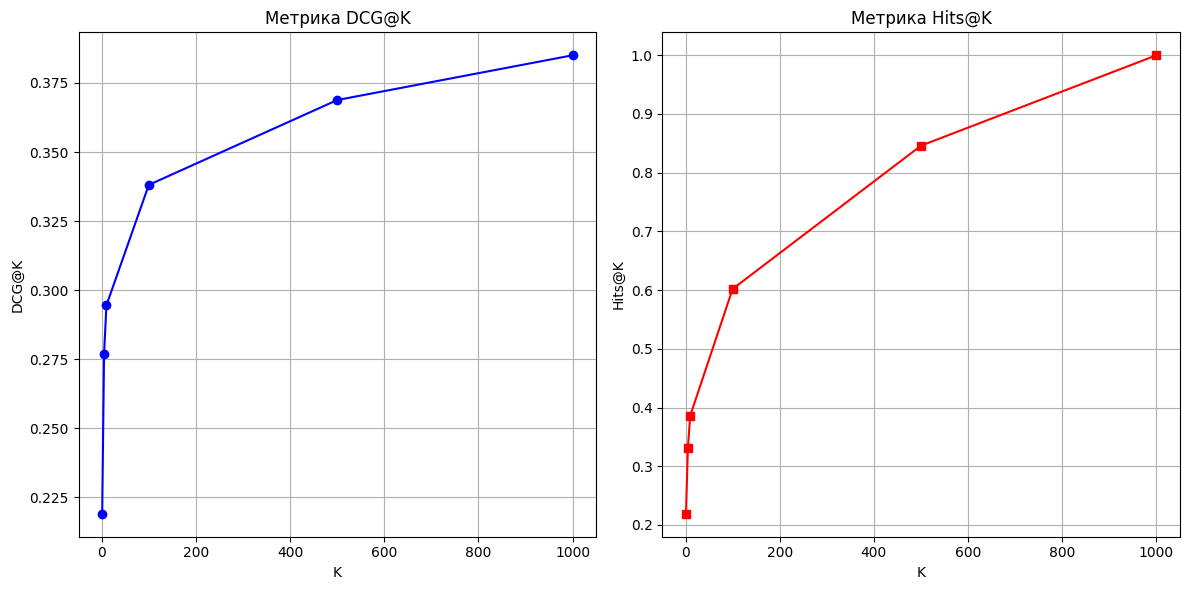

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

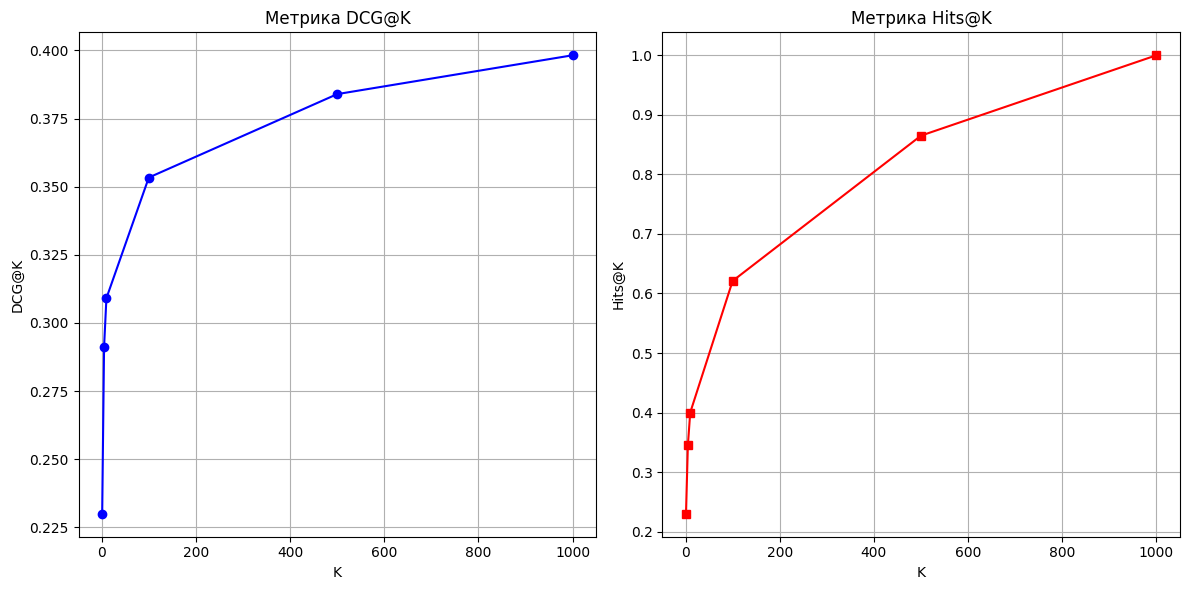

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

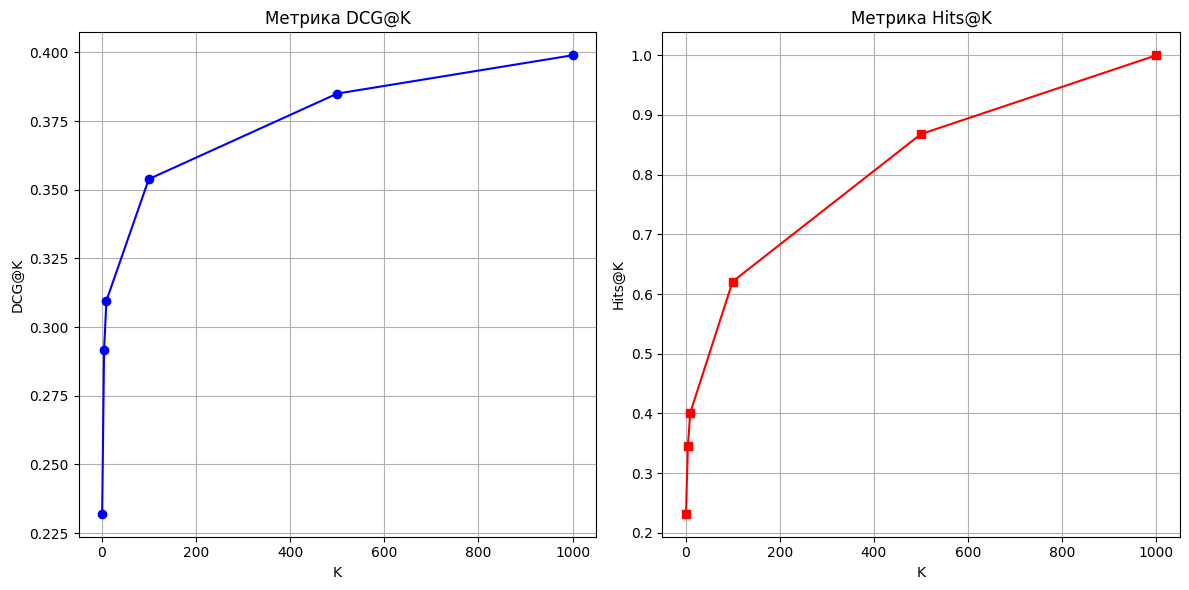

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

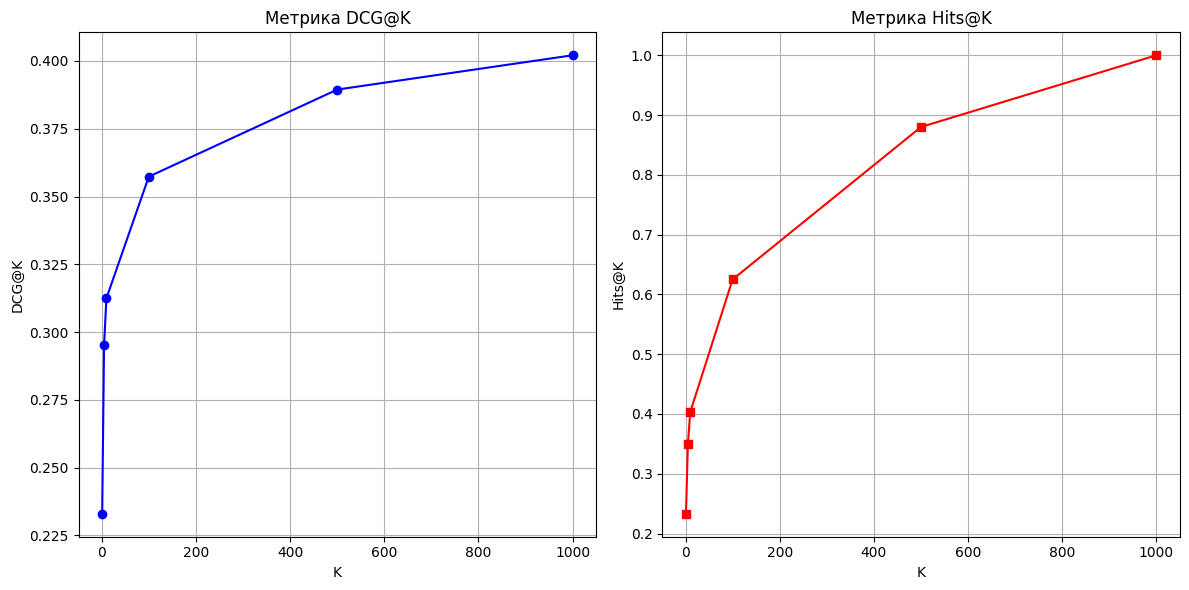

Подбор параметра min_count (window=3):   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

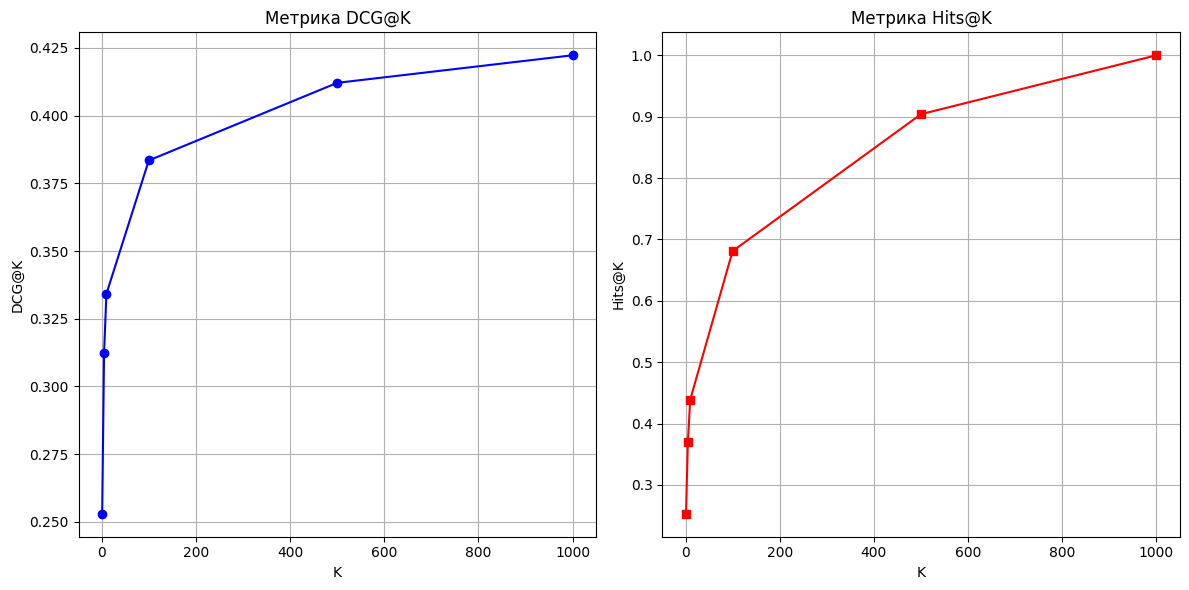

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

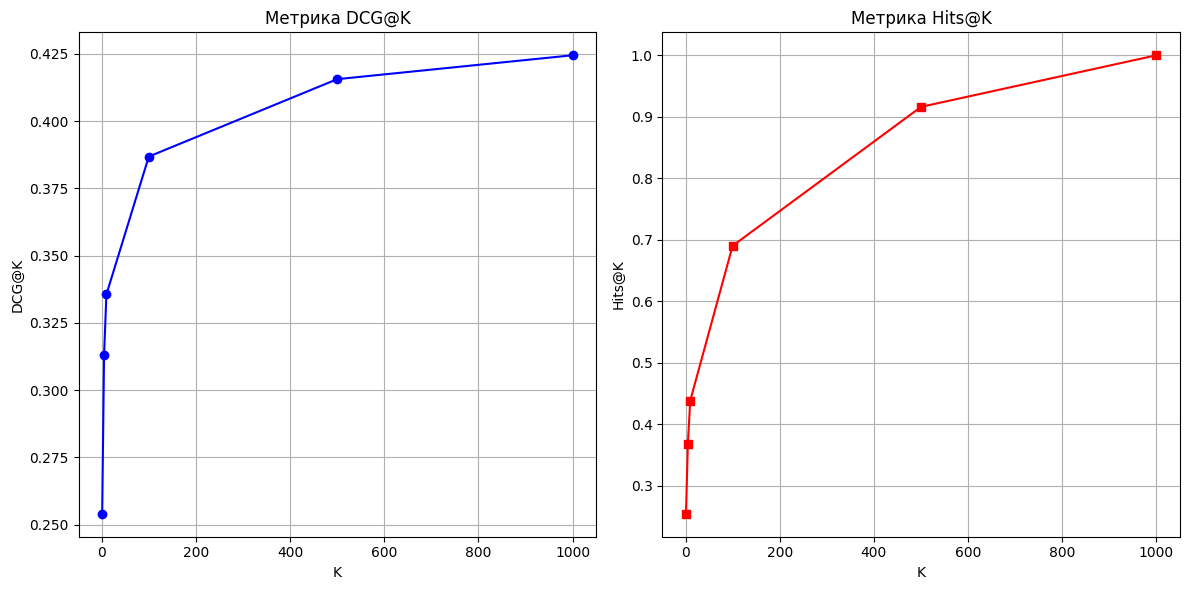

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

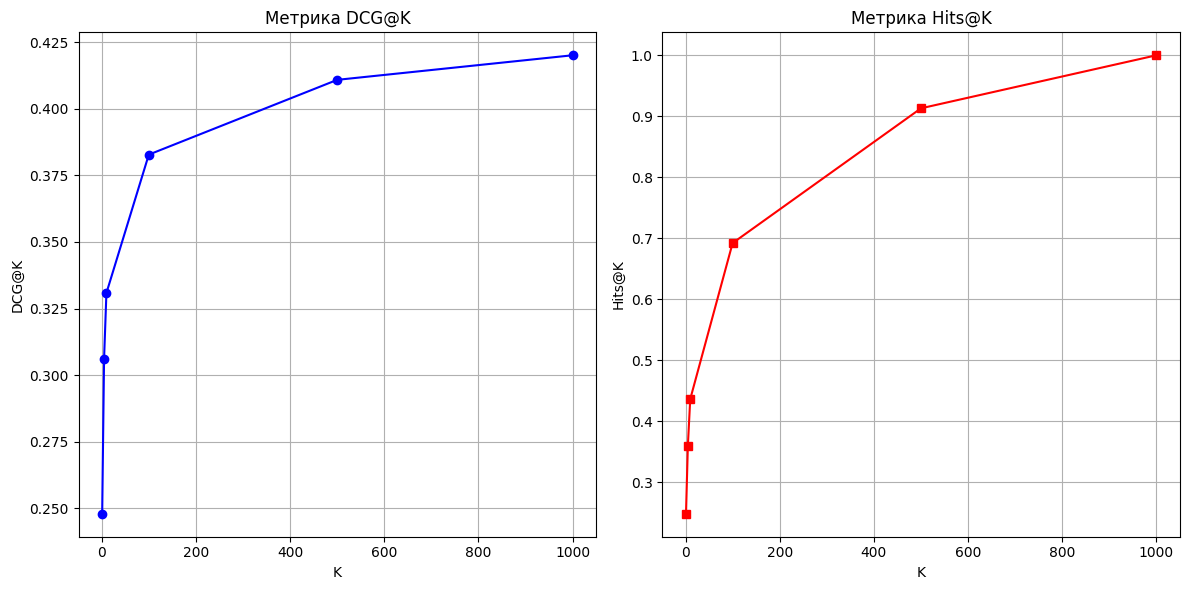

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

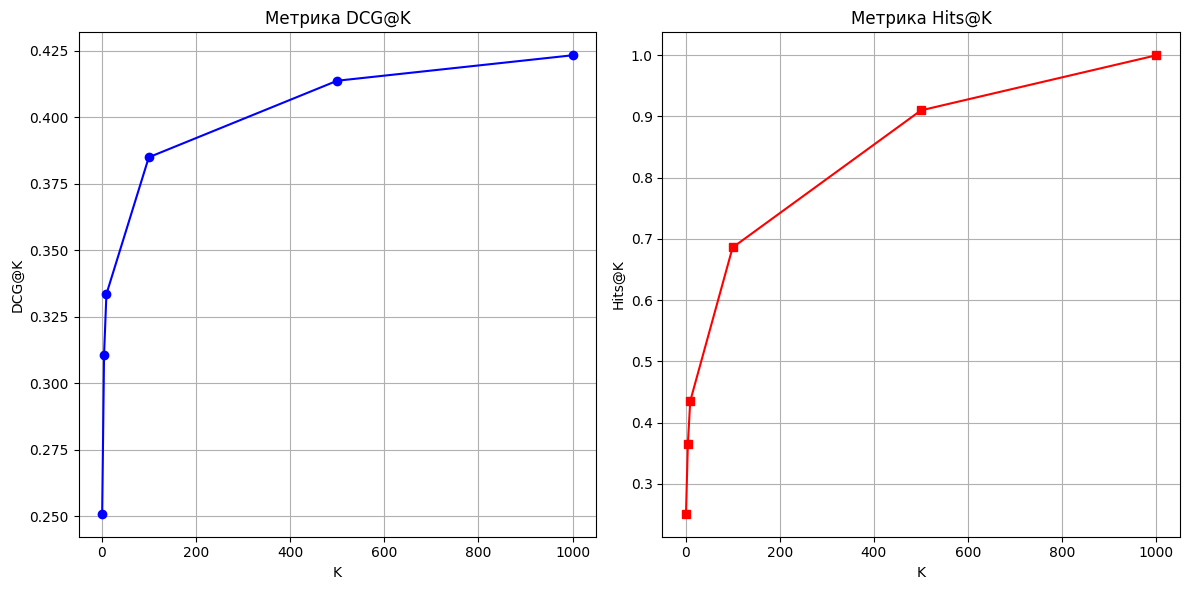

Подбор параметра min_count (window=5):   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

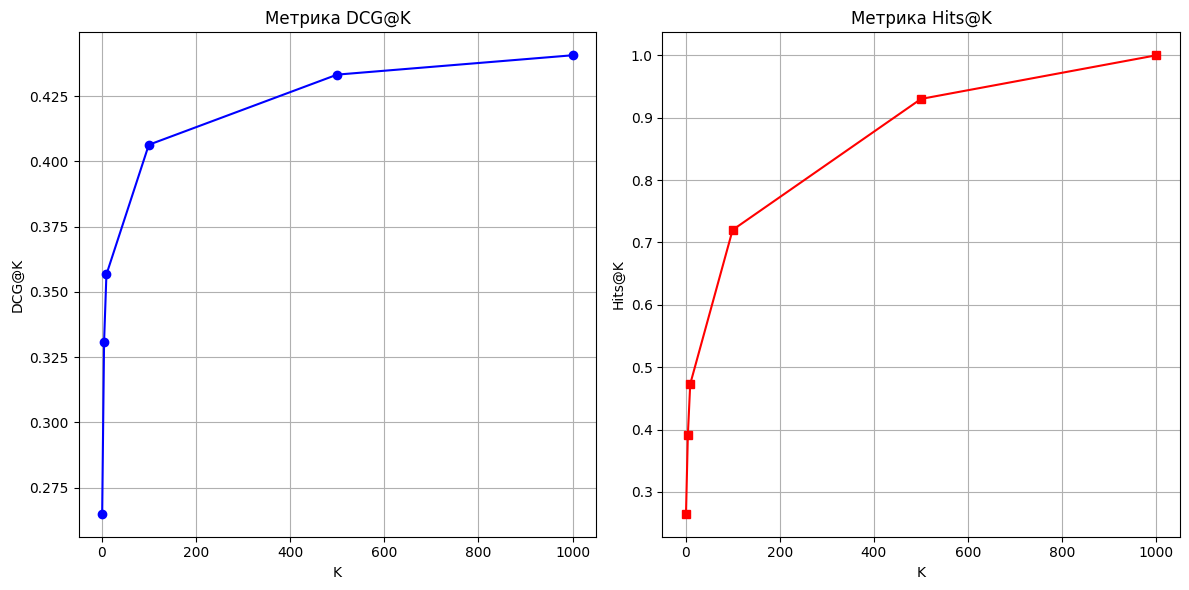

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

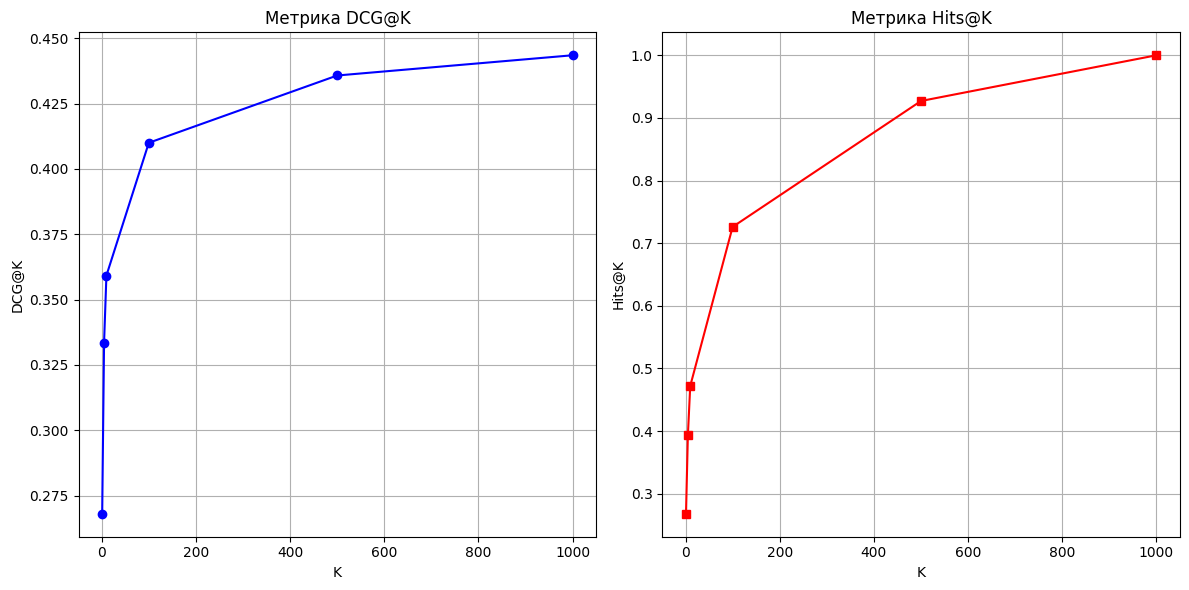

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

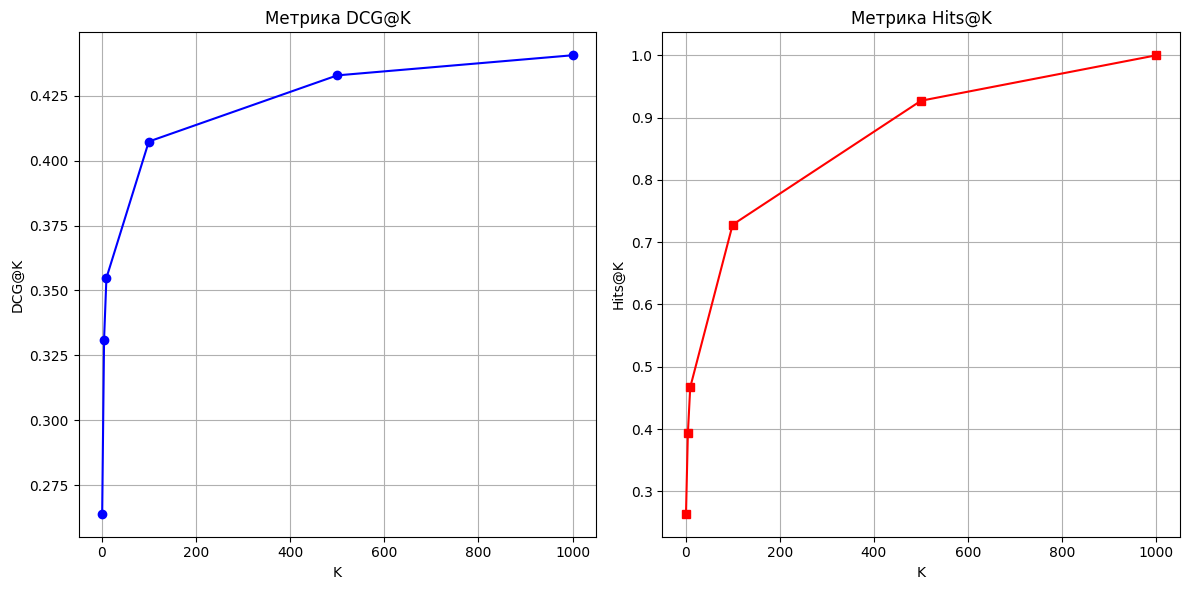

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

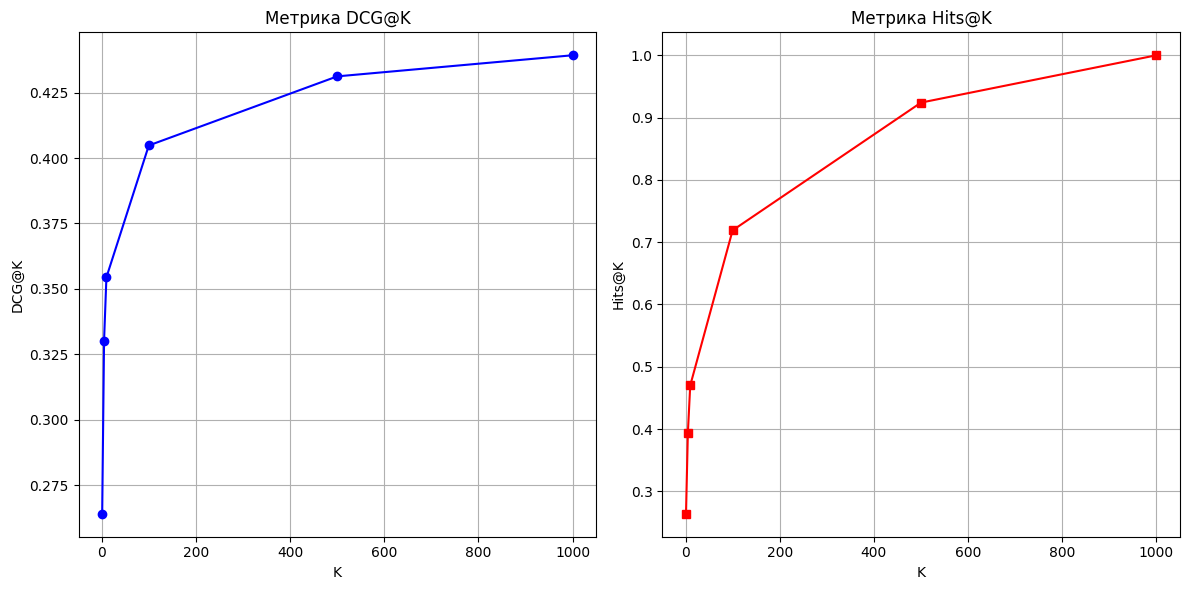

Подбор параметра min_count (window=10):   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

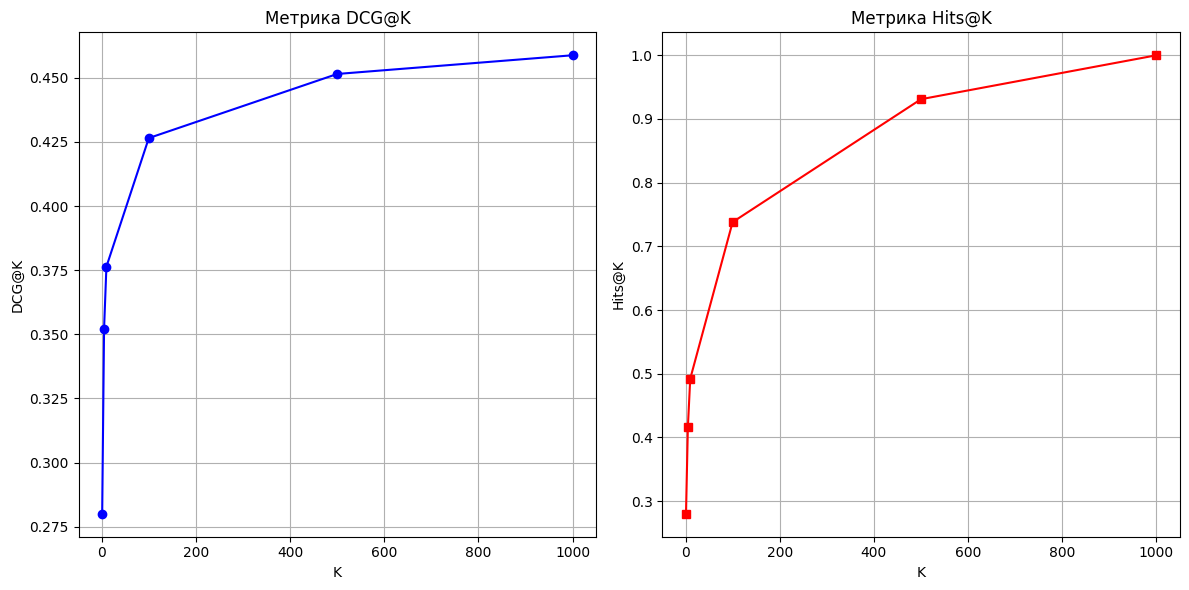

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

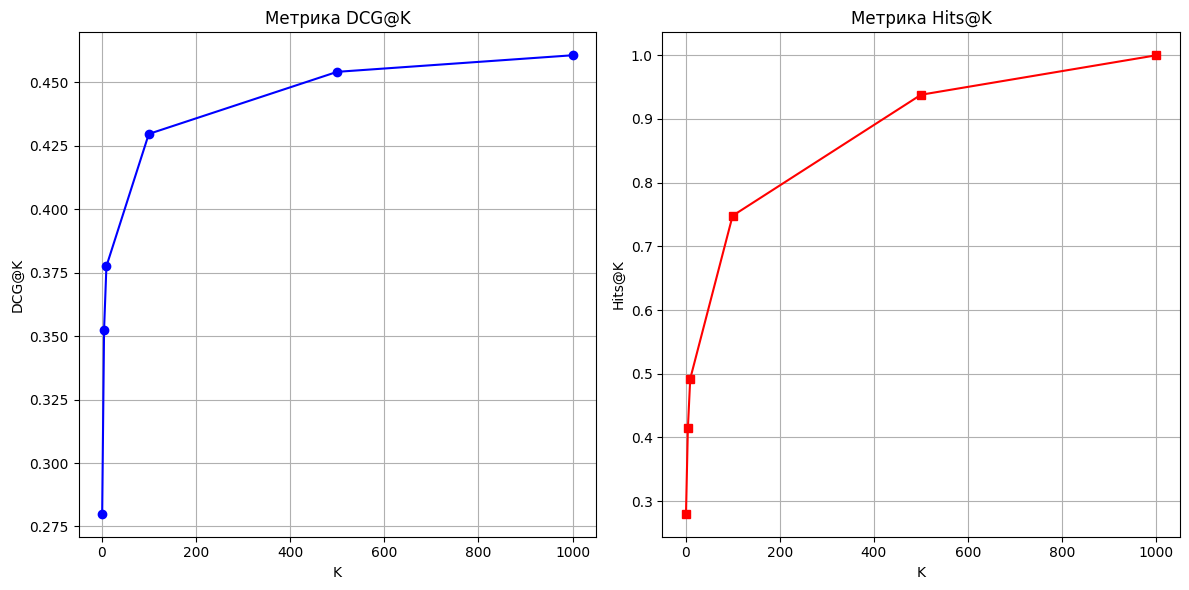

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

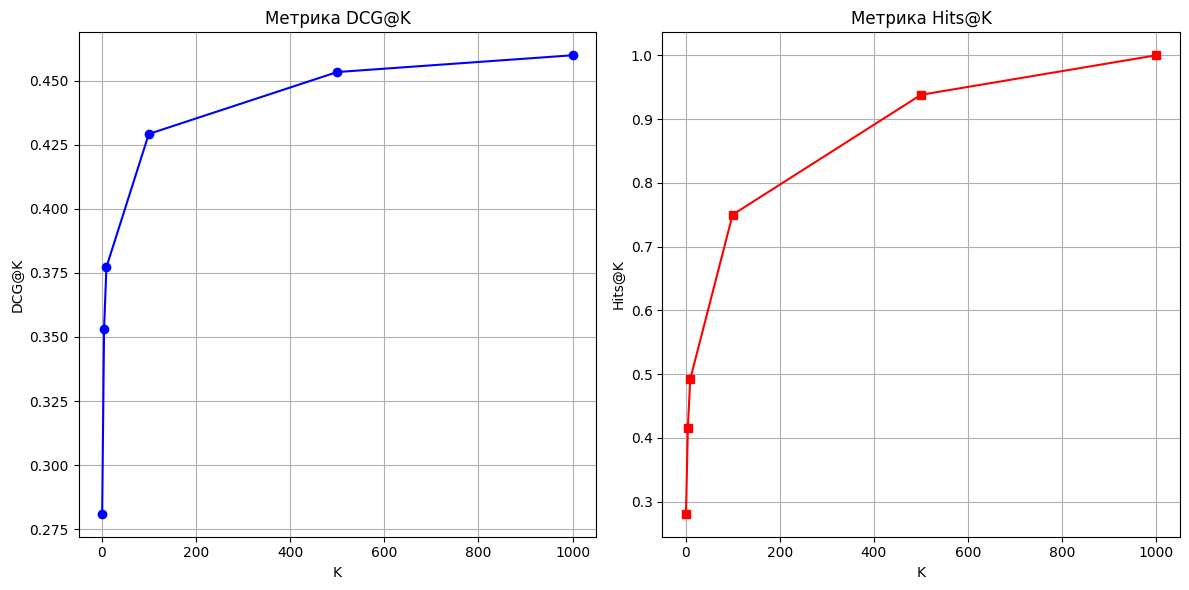

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

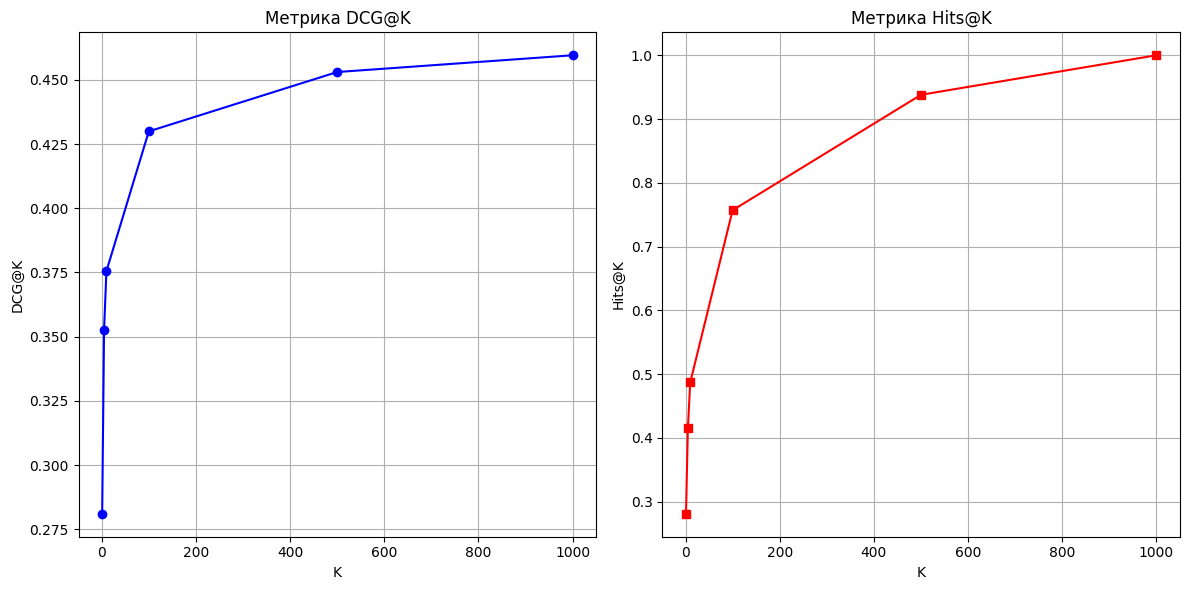

Лучшие параметры: {'window': 10, 'min_count': 3}


In [ ]:
from gensim.models import Word2Vec
window_values = [1, 3, 5, 10]
min_count_values = [1, 3, 5, 10]

best_params = None
best_score = 0
for window in tqdm(window_values, desc = f"Подбор параметра window"):
    for min_count in tqdm(min_count_values, desc = f"Подбор параметра min_count (window={window})", leave=False):
        embeddings_trained = Word2Vec(
            sentences=corpus,        # Корпус токенизированных текстов
            vector_size=200,         # Размерность векторов
            window=window,                # Размер окна контекста
            min_count=min_count,             # Минимальная частота слов
            workers=4                # Количество потоков
        ).wv

        dcg_scores, hits_scores = evaluate_model(validation_data, embeddings_trained, tokenizer)
        score = dcg_scores[1000]
        if score > best_score:
            best_score = score
            best_params = {'window': window, 'min_count': min_count}

        plot_two_graphs(dcg_scores, hits_scores, title1="Метрика DCG@K", title2="Метрика Hits@K")
print(f"Лучшие параметры: {best_params}")

Ещё раз продемонстрируем графики для лучших параметров window = 10, min_count = 3

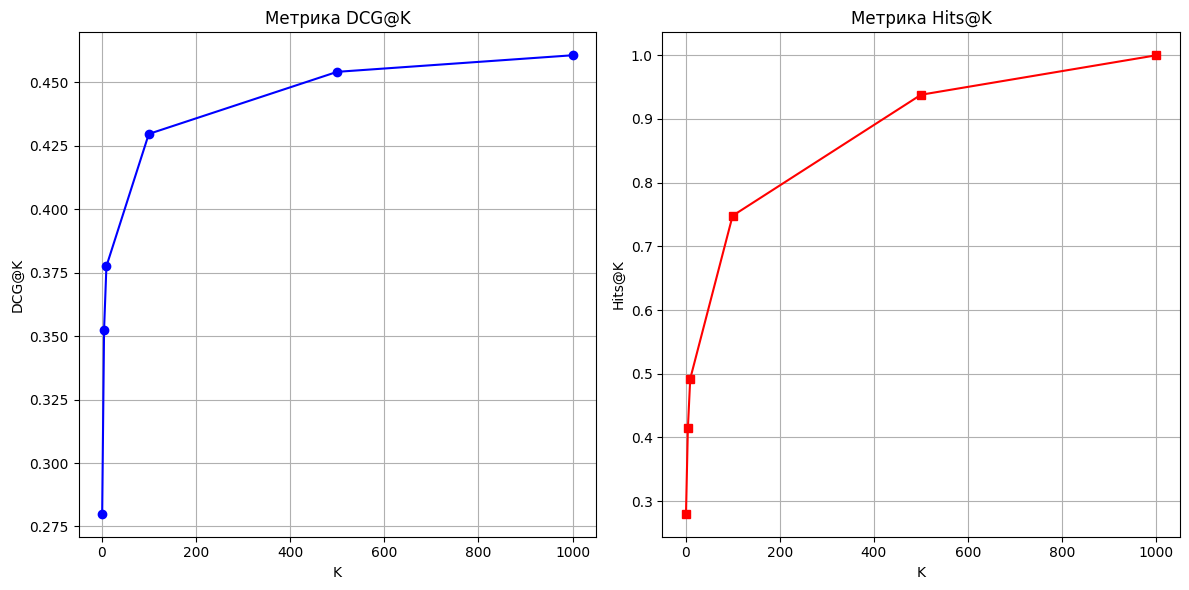

* **Какой принцип токенизации даёт качество лучше и почему?**
По метрике DCG@K качество лучше даёт второй принцип токенизации, где мы объединяли вопрос с поставленным ему в соответствие кандидатом. Если при первом принципе токенизации `DCG@1000 = 0.444`, то при втором `DCG@1000 > 0.45`. Я думаю, это связано с несколькими моментами:

1.   объединение вопроса и кандидата позволяют модели лучше учитывать контекст между вопросом и кандидатом и лучше понимать связь между словами вопроса и похожими словами кандидата. В первом же способе данный контекст теряется.
2.   благодаря параметру window слова из вопроса и кандидата оказываются в пределах одного окна и это позволяет модели лучше обучаться на связях между словами, как раз при окне 10, не очень большом и не очень маленьком, достигалось лучшее качество.




* **Помогает ли нормализация слов?**
Под нормализацией понимается например приведение к нижнему регистру, удаление пунктуации, лемматизация и стемминг. Нормализация помогает улучшить качество модели, так как благодаря ей сокращается количество токенов, устраняются вариации однокоренных слов. Однако применять нормализацию нужно аккуратно дабы не допустить потерю важной информации.

* **Какие эмбеддинги лучше справляются с задачей и почему?**
Лучше справились эмбеддинги, полученные при обучении модели Word2Vec на склеенных вопросах. Я думаю, это связано с тем, что применена более эффективная токенизация, что позволило получить лучше качество чем при использовании предобученных эмбеддингов.

* **Почему получилось плохое качество решения задачи?**
Возможные причины:  

1. Не было нормализации
2. Не удаляли стоп-слова
3. Гиперпараметры Word2Vec выбраны не самые оптимальные, мы их выбирали перебором.
4. Недостаточно большой объем корпуса текстов.
5. Сама модель Word2Vec возможно недостаточно хорошо учитывает контекст.

* **Вариант другого подхода к решению задачи.**
1. Можно использовать другую модель, такую как BERT, которая будет вычислять более точные эмбеддинги. Или же использовать ансамбль моделей.
2. Сделать нормализацию. Проанализировать, какие стоп-слова допустимо удалить, и удалить эти стоп-слова.
3. Увеличить размер корпуса текстов.

